<a href="https://colab.research.google.com/github/jaehyun99/Computer_Vision/blob/main/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

def insert_img(background_img, object_img, x_offset, y_offset):

  x_end = x_offset + object_img.shape[1]  ## x 우측 끝 점
  y_end = y_offset + object_img.shape[0]  ## y 아래쪽 끝 점

  output_img = np.copy(background_img)    ## 출력 이미지

  for idxy, y in enumerate(range(y_offset,y_end)):
    for idxx, x in enumerate(range(x_offset,x_end)):
      if sum(object_img[idxy, idxx]) == 0:    ## 만약 물체 이미지 값이 검은색일 경우
        output_img[y,x] = background_img[y,x]   ## 배경 이미지 값 넣기
      else:
        output_img[y,x] = object_img[idxy, idxx]    ## 아닐 경우 물체 이미지 값 넣기

  return output_img


dirpath = "drive/MyDrive/PR201910807/images/lab03/"

ball = cv2.imread(dirpath+"ball1.png")

court1 = cv2.imread(dirpath+"court1.png")
court2 = cv2.imread(dirpath+"court2.png")

playerA_1 = cv2.imread(dirpath+"playerA_1.png")
playerA_2 = cv2.imread(dirpath+"playerA_2.png")
playerA_3 = cv2.imread(dirpath+"playerA_3.png")
playerA_4 = cv2.imread(dirpath+"playerA_4.png")
playerA_5 = cv2.imread(dirpath+"playerA_5.png")

playerB_1 = cv2.imread(dirpath+"playerB_1.png")
playerB_2 = cv2.imread(dirpath+"playerB_2.png")
playerB_3 = cv2.imread(dirpath+"playerB_3.png")
playerB_4 = cv2.imread(dirpath+"playerB_4.png")

referee = cv2.imread(dirpath+"referee.png")

In [ ]:
#Flip
img = playerB_4
height = img.shape[0]
width = img.shape[1]
center = (width / 2, height / 2)


M1 = np.array([[1,0,width],
               [0,1,0],
               [0,0,1]], dtype = np.float32)

M2 = np.array([[-1,0,0],
               [0,1,0],
               [0,0,1]], dtype = np.float32)

my_M = np.matmul(M1, M2)
my_M = my_M[0:2, :]

img_flip = cv2.warpAffine(img, my_M, (width, height))

#회전
img = playerA_1


height = img.shape[0]
width = img.shape[1]
center = (width / 2, height / 2 )

d30 = 30*np.pi/180 #45도
d90 = -90.0*np.pi/180 #90도

M1 = np.array([[np.cos(d30),-1*np.sin(d30),0],
               [np.sin(d30),np.cos(d30),0],
               [0,0,1]], dtype = np.float32)

M2 = np.array([[1,0,80],
               [0,1,-30],
               [0,0,1]], dtype = np.float32)

cvrotate = cv2.getRotationMatrix2D((0,0),90,1.0)
cvrotate = (np.append(cvrotate, [0,0,1])).reshape(3,3)

cv_M = np.matmul(M2, cvrotate)
cv_M = my_M[0:2,:]
cv_result = cv2.warpAffine(img,cv_M,(height,width))

my_M = np.matmul(M2, M1)
my_M = my_M[0:2, :]

img_rot = cv2.warpAffine(img, my_M, (height, width+40))

#resize

img = ball

img_resize=cv2.resize(img,(40,40))

img = playerB_3

playerB_3_re=cv2.resize(img,(80,120))

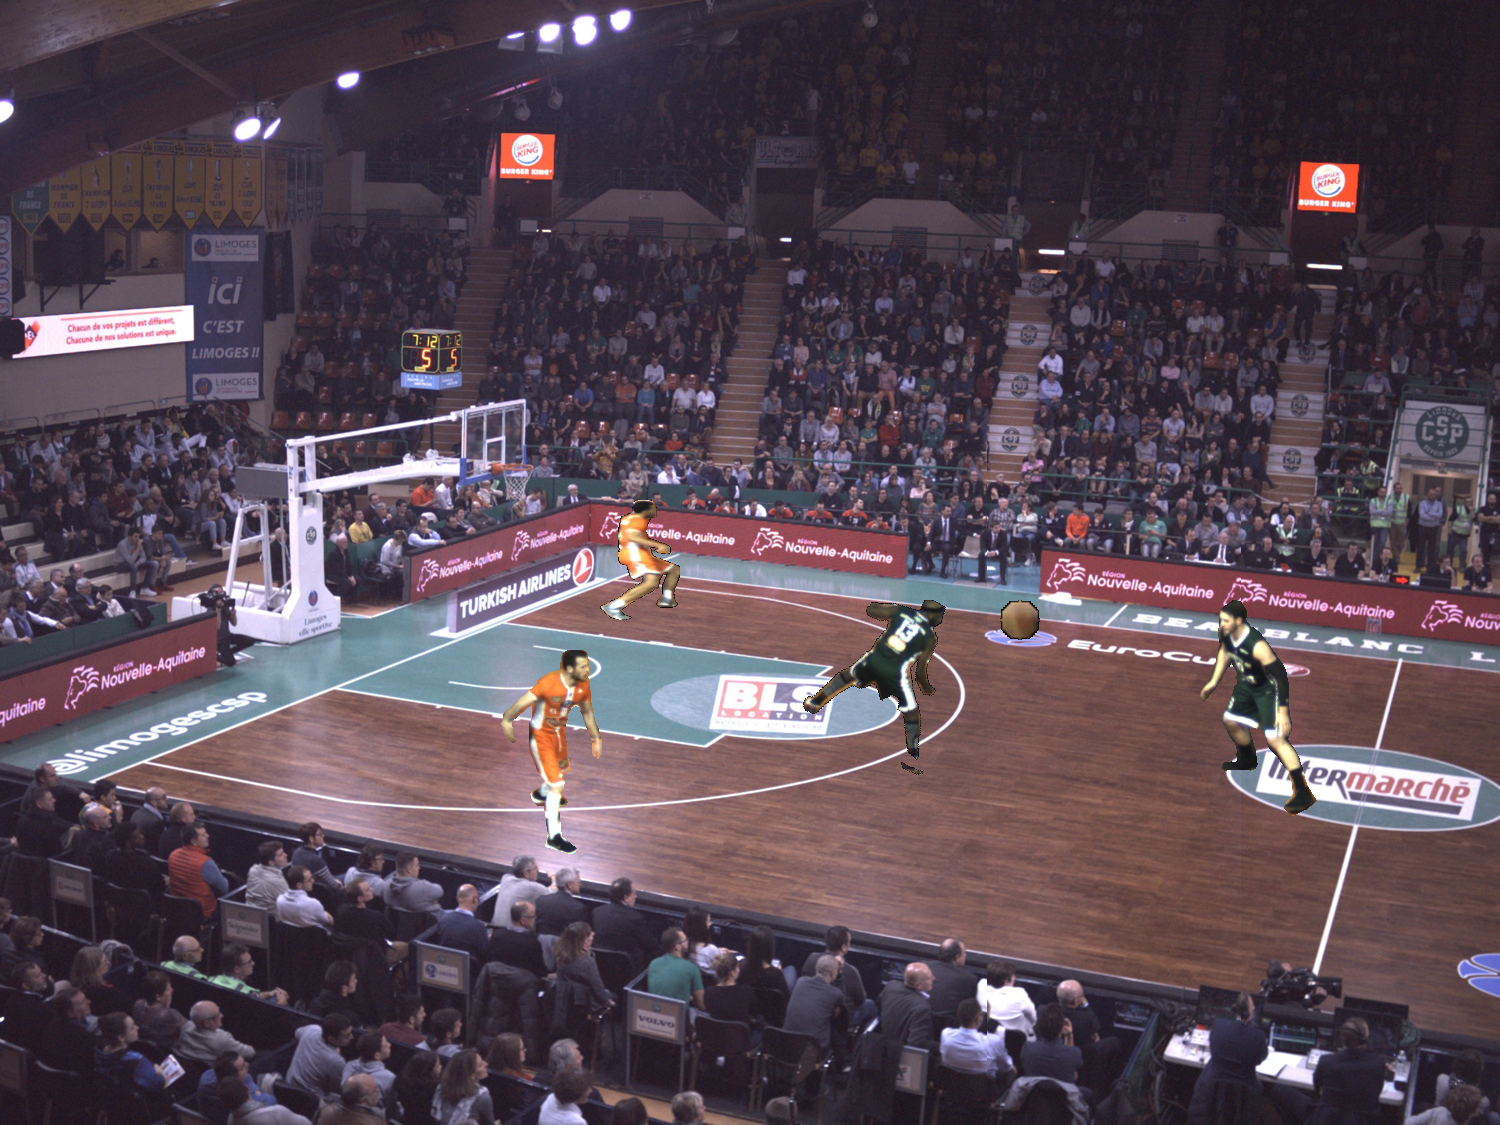

In [ ]:
testinsert = insert_img(court1, img_flip, 500, 650)
testinsert = insert_img(testinsert, img_rot, 800, 600)
testinsert = insert_img(testinsert, img_resize, 1000, 600)
testinsert = insert_img(testinsert, playerA_3,1200, 600)
testinsert = insert_img(testinsert, playerB_3_re,600, 500)
cv2_imshow(testinsert)